Sklearn의 make_classification() 함수는 분류에 쓰일 수 있는 데이터를 생성해준다.

```
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)
```

Sklearn으로 이진 베이지안 모델링을 해보자.

### (1) X, Y 데이터를 생성

In [1]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

### (2) X의 평균과 표준편차 계산해서 출력

In [2]:
X_mean = X.mean()
X_std = X.std()

print(f"평균: {X_mean}\n표준편차: {X_std}")

평균: 0.11728690210457478
표준편차: 1.34067591765565


### (3) 그래프 작성

* scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.


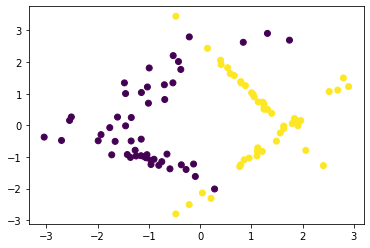

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

### (4) 훈련데이터, 테스트데이터 3:1로 분리

* train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.

In [4]:
from sklearn.model_selection import train_test_split

# 3 : 1 = 0.75 : 0.25
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### (5) 훈련데이터에 대하여 BernoulliNB 모델링

* X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.

In [5]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.0)

bnb.fit(X_train, Y_train)

BernoulliNB()

### (6) 테스트데이터에 대하여 예측값을 출력

* 예측이 맞는지 실제값 Y와 비교해보자.

In [6]:
for pred, gt in zip(bnb.predict(X_test), Y_test):
    print(f"예측: {pred} \t실제: {gt}")

예측: 0 	실제: 0
예측: 1 	실제: 1
예측: 0 	실제: 0
예측: 1 	실제: 1
예측: 1 	실제: 1
예측: 0 	실제: 0
예측: 1 	실제: 1
예측: 1 	실제: 1
예측: 1 	실제: 1
예측: 0 	실제: 0
예측: 1 	실제: 1
예측: 1 	실제: 1
예측: 0 	실제: 1
예측: 0 	실제: 0
예측: 0 	실제: 0
예측: 1 	실제: 1
예측: 1 	실제: 1
예측: 0 	실제: 0
예측: 1 	실제: 1
예측: 1 	실제: 1
예측: 0 	실제: 0
예측: 0 	실제: 0
예측: 0 	실제: 0
예측: 1 	실제: 1
예측: 0 	실제: 0


### (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

In [7]:
for pred, gt in zip(bnb.predict(X_test), Y_test):
    if pred != gt : s = "<- 오류"
    else: s = ""
    print(f"예측: {pred} \t실제: {gt}\t{s}")

예측: 0 	실제: 0	
예측: 1 	실제: 1	
예측: 0 	실제: 0	
예측: 1 	실제: 1	
예측: 1 	실제: 1	
예측: 0 	실제: 0	
예측: 1 	실제: 1	
예측: 1 	실제: 1	
예측: 1 	실제: 1	
예측: 0 	실제: 0	
예측: 1 	실제: 1	
예측: 1 	실제: 1	
예측: 0 	실제: 1	<- 오류
예측: 0 	실제: 0	
예측: 0 	실제: 0	
예측: 1 	실제: 1	
예측: 1 	실제: 1	
예측: 0 	실제: 0	
예측: 1 	실제: 1	
예측: 1 	실제: 1	
예측: 0 	실제: 0	
예측: 0 	실제: 0	
예측: 0 	실제: 0	
예측: 1 	실제: 1	
예측: 0 	실제: 0	


In [8]:
bnb.score(X_test, Y_test)

0.96